## Analyzing Sentiment and Word Usage in Presidential Farewell Speeches: A Comparative Study

### 1. Objective:

The research project aims to analyze the farewell speeches delivered by the Presidents of the United States, specifically focusing on the collection of farewell speeches archived by UC Santa Barbara. The primary objectives of the project include identifying the commonly used words by the Presidents in their farewell speeches and determining the unique number of words used by each President. Additionally, the project seeks to compare and contrast the farewell transcripts of different Presidents, highlighting the similarities and differences in their speeches.

By studying the farewell speeches, the project aims to uncover patterns, themes, and key messages conveyed by the Presidents during this significant moment of transition. The analysis of commonly used words will provide insights into the shared vocabulary and recurring themes among the Presidents. Moreover, the unique number of words used by each President will help gauge the breadth and depth of their farewell messages.

Furthermore, the project seeks to conduct a comparative analysis of the farewell transcripts to identify distinct styles, tones, and focuses employed by different Presidents. By examining the similarities and differences, the research aims to shed light on the individual approaches and priorities of the Presidents during their farewell addresses.

Overall, this research project delves into the farewell speeches of the Presidents of the United States, aiming to extract meaningful information, uncover patterns, and provide a comprehensive analysis of the content, style, and themes present in these historic speeches. 
        
### 2. Data gathering:

The web scraped data obtained from UC Santa Barbara (UCSB) will be utilized solely for educational purposes. The process involved using Beautiful Soup web scraping techniques to extract all available transcripts from the provided URL.

The project includes the following steps:

Request Make HTTP Calls: The program initiates HTTP calls to the provided URL to fetch the web page content.

Parse HTML Document: Using Beautiful Soup, the HTML document is parsed to extract the relevant parts of the website, specifically focusing on the transcripts of the farewell speeches.

Extract Parts of the Website: The necessary information, i.e., the farewell speeches of the Presidents, is extracted from the parsed HTML document. This data will be utilized for further analysis and research.

Please note that the data obtained through web scraping is intended for educational purposes and adheres to the ethical guidelines of data usage.
        
### 3. Data Cleaning:

To ensure the text data is prepared for analysis, the following cleaning steps will be applied:

Remove Punctuation: Punctuation marks such as periods, commas, and quotation marks will be removed from the text. This step helps to eliminate unnecessary noise and focus on the essential words.

Change to Lowercase: All the text will be converted to lowercase. This normalization step ensures that the analysis is not case-sensitive and helps to avoid duplicate words due to case variations.

Remove Numbers: Numeric characters will be removed from the text. Since numbers typically do not contribute significantly to the analysis of word frequency or patterns, eliminating them helps to streamline the data.

Tokenize: The text will be tokenized, which means splitting it into individual words or tokens. This process allows for further analysis on a word-by-word basis.

Remove Stop Words: Stop words, such as "the," "and," or "is," which do not carry significant meaning in the context of the analysis, will be removed. Removing stop words helps to reduce noise in the data and focuses on the more relevant content.

Create Bag of Words: A bag of words representation will be created, which is a frequency-based numerical representation of the text. It captures the occurrence count of each word in the text corpus, forming the basis for further analysis and modeling.

By implementing these data cleaning steps, the text data will be prepared and optimized for subsequent analysis, enabling insights into the frequency and patterns of words used in the farewell speeches of the Presidents.
        
### 4. Output:

#### Sentiment Analysis:

Apply sentiment analysis techniques to each word/token in the farewell speeches.
Assign a sentiment score or label to each word/token, indicating whether it is positive, negative, or neutral.
Calculate the overall sentiment score for each speech by aggregating the sentiment scores of all the words/tokens used.
Analyze the distribution of sentiment scores across the farewell speeches to determine if the Presidents used predominantly positive or negative comments.

#### Frequency Analysis:

Count the frequency of each word used in the farewell speeches.
Identify the most frequently used words by the Presidents.
Create a word cloud or a ranked list of the top words to visually represent the frequently used words.

#### Polarity Analysis:

Based on the sentiment scores assigned to each word/token, calculate the overall polarity of each farewell speech.
Determine the average sentiment score or polarity of all the speeches to understand the general sentiment expressed by the Presidents.
Classify the speeches as predominantly positive, negative, or neutral based on the calculated polarity.x


### Source Data

In [10]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/farewell-addresses'
r = requests.get(url)

html_table = BeautifulSoup(r.text).find('table')
r.close()

for item in html_table.select("h4"):
    item.decompose()

df = pd.read_html(str(html_table), header=0)[0]
df = df.loc[:,['President','Date (click for text)','Location', 'Words']]
df['President'] = df['President'].str.replace('\s*\*', '', regex=True)
df['President'] = df['President'].str.replace(r'\([^()]*\)', '', regex=True).str.strip()

df = df.dropna()
df


,President,Date (click for text),Location,Words
1,George Washington,"September 19, 1796",(written),6073.0
2,Andrew Jackson,"March 4, 1837",(written),8247.0
4,Harry S. Truman,"January 15, 1953",Oval Office,3748.0
5,Dwight D. Eisenhower,"January 17, 1961",Oval Office,1843.0
7,Lyndon B. Johnson,"January 14, 1969",House Chamber,4146.0
8,Richard Nixon,"August 8, 1974",Oval Office,1796.0
9,Gerald R. Ford,"January 12, 1977",House Chamber,4724.0
10,Jimmy Carter,"January 14, 1981",Oval Office,2167.0
11,Ronald Reagan,"January 11, 1989",Oval Office,3305.0
12,George Bush,"January 5, 1993",West Point,3298.0


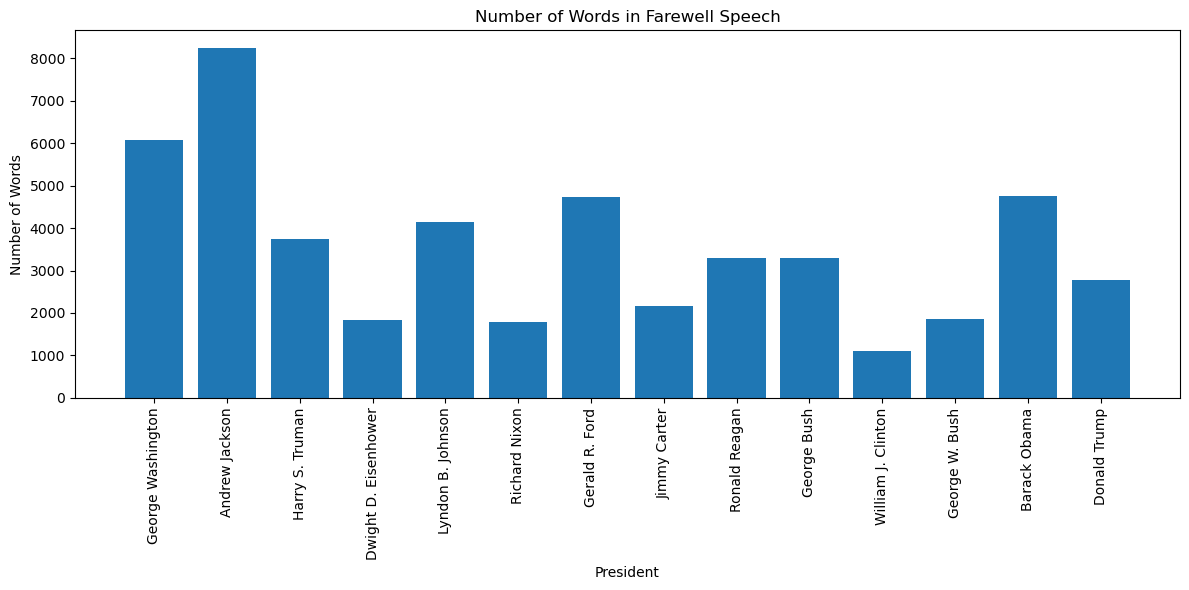

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

plt.bar(df['President'], df['Words'])
plt.xlabel("President")
plt.ylabel("Number of Words")
plt.title("Number of Words in Farewell Speech")

plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees if needed

plt.tight_layout()  # Adjust the spacing between plot elements
plt.show()



The following plot illustrates the word count in the farewell speeches delivered by the Presidents.

In [12]:
urls = [link.get('href') for link in html_table.find_all('a')]
urls

['https://www.presidency.ucsb.edu/ws/index.php?pid=65539',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=67087',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=14392',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=12086',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=29333',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=4324',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=5555',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=44516',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=29650',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=20414',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=63777',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=85423',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=119928',
 'https://www.presidency.ucsb.edu/documents/farewell-address-the-nation-3']

In [13]:
df['Link'] = [link.get('href') for link in html_table.find_all('a')]

In [15]:
df

,President,Date (click for text),Location,Words,Link
1,George Washington,"September 19, 1796",(written),6073.0,https://www.presidency.ucsb.edu/ws/index.php?p...
2,Andrew Jackson,"March 4, 1837",(written),8247.0,https://www.presidency.ucsb.edu/ws/index.php?p...
4,Harry S. Truman,"January 15, 1953",Oval Office,3748.0,https://www.presidency.ucsb.edu/ws/index.php?p...
5,Dwight D. Eisenhower,"January 17, 1961",Oval Office,1843.0,https://www.presidency.ucsb.edu/ws/index.php?p...
7,Lyndon B. Johnson,"January 14, 1969",House Chamber,4146.0,https://www.presidency.ucsb.edu/ws/index.php?p...
8,Richard Nixon,"August 8, 1974",Oval Office,1796.0,https://www.presidency.ucsb.edu/ws/index.php?p...
9,Gerald R. Ford,"January 12, 1977",House Chamber,4724.0,https://www.presidency.ucsb.edu/ws/index.php?p...
10,Jimmy Carter,"January 14, 1981",Oval Office,2167.0,https://www.presidency.ucsb.edu/ws/index.php?p...
11,Ronald Reagan,"January 11, 1989",Oval Office,3305.0,https://www.presidency.ucsb.edu/ws/index.php?p...
12,George Bush,"January 5, 1993",West Point,3298.0,https://www.presidency.ucsb.edu/ws/index.php?p...


In [16]:
def url_to_transcript(url):

    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find("div", class_="field-docs-content").find_all('p')]
    #print(url)
    #print(text)
    return text


Presidents = ['George Washington','Andrew Jackson','Harry S. Truman','Dwight D. Eisenhower','Lyndon B. Johnson','Richard Nixon','Gerald R. Ford','Jimmy Carter','Ronald Reagan','George Bush','William J. Clinton','George W. Bush','Barack Obama','Donald Trump']

In [17]:
transcripts = [url_to_transcript(u) for u in urls]
    

In [19]:
!mkdir transcripts
import pickle


for i, c in enumerate(Presidents):
    with open("transcripts/" + c + ".txt", 'wb') as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [20]:
# Load pickled files
data = {}
for i, c in enumerate(Presidents):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [21]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['George Washington', 'Andrew Jackson', 'Harry S. Truman', 'Dwight D. Eisenhower', 'Lyndon B. Johnson', 'Richard Nixon', 'Gerald R. Ford', 'Jimmy Carter', 'Ronald Reagan', 'George Bush', 'William J. Clinton', 'George W. Bush', 'Barack Obama', 'Donald Trump'])

In [22]:
# More checks
data['William J. Clinton'][:2]

['My fellow citizens, tonight is my last opportunity to speak to you from the Oval Office as your President. I am profoundly grateful to you for twice giving me the honor to serve, to work for you and with you to prepare our Nation for the 21st century.',
 "And I'm grateful to Vice President Gore, to my Cabinet Secretaries, and to all those who have served with me for the last 8 years."]

## Cleaning data

Since the data i will be using is text data i will be doing the common cleaning techniques
1. change to lower case
2. remove puntutaion
3. remove numerical values
4. remove /n
5. tokenize
6. remove stop words

In [23]:
# Let's take a look at our data again
next(iter(data.keys()))

'George Washington'

In [24]:
# Notice that our dictionary is currently in key: president, value: list of text format
next(iter(data.values()))

['Friends and Fellow Citizens:',
 'The period for a new election of a citizen to administer the Executive Government of the United States being not far distant, and the time actually arrived when your thoughts must be employed in designating the person who is to be clothed with that important trust, it appears to me proper, especially as it may conduce to a more distinct expression of the public voice, that I should now apprise you of the resolution I have formed to decline being considered among the number of those out of whom a choice is to be made.',
 'I beg you at the same time to do me the justice to be assured that this resolution has not been taken without a strict regard to all the considerations appertaining to the relation which binds a dutiful citizen to his country; and that in withdrawing the tender of service, which silence in my situation might imply, I am influenced by no diminution of zeal for your future interest, no deficiency of grateful respect for your past kindne

In [25]:
# We are going to change this to key: President, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [26]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [27]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Andrew Jackson,"FELLOW-CITIZENS: Being about to retire finally from public life, I beg leave to offer you my grateful thanks for the many proofs of kindness and c..."
Barack Obama,"The President. Hello, Chicago! It's good to be home! Thank you. Thank you, everybody. Thank you. Thank you so much. Thank you. It's good to be hom..."
Donald Trump,"My fellow Americans, 4 years ago, we launched a great national effort to rebuild our country, to renew its spirit, and to restore the allegiance o..."
Dwight D. Eisenhower,"My fellow Americans: Three days from now, after half a century in the service of our country, I shall lay down the responsibilities of office as, ..."
George Bush,"Thank you all very much. Good luck. Please be seated. Thank you, General Graves, for that very kind introduction. Barbara and I are just delighted..."
George W. Bush,"Thank you. Fellow citizens: For 8 years, it has been my honor to serve as your President. The first decade of this new century has been a period o..."
George Washington,Friends and Fellow Citizens: The period for a new election of a citizen to administer the Executive Government of the United States being not far ...
Gerald R. Ford,"Mr. Speaker, Mr. Vice President, Members of the 95th Congress, and distinguished guests: In accordance with the Constitution, I come before you on..."
Harry S. Truman,"My fellow Americans: I am happy to have this opportunity to talk to you once more before I leave the White House. Next Tuesday, General Eisenhower..."
Jimmy Carter,"Good evening. In a few days I will lay down my official responsibilities in this office, to take up once more the only title in our democracy supe..."


In [28]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [29]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
Andrew Jackson,fellowcitizens being about to retire finally from public life i beg leave to offer you my grateful thanks for the many proofs of kindness and conf...
Barack Obama,the president hello chicago its good to be home thank you thank you everybody thank you thank you so much thank you its good to be home thanks all...
Donald Trump,my fellow americans years ago we launched a great national effort to rebuild our country to renew its spirit and to restore the allegiance of thi...
Dwight D. Eisenhower,my fellow americans three days from now after half a century in the service of our country i shall lay down the responsibilities of office as in t...
George Bush,thank you all very much good luck please be seated thank you general graves for that very kind introduction barbara and i are just delighted to be...
George W. Bush,thank you fellow citizens for years it has been my honor to serve as your president the first decade of this new century has been a period of con...
George Washington,friends and fellow citizens the period for a new election of a citizen to administer the executive government of the united states being not far d...
Gerald R. Ford,mr speaker mr vice president members of the congress and distinguished guests in accordance with the constitution i come before you once again to...
Harry S. Truman,my fellow americans i am happy to have this opportunity to talk to you once more before i leave the white house next tuesday general eisenhower wi...
Jimmy Carter,good evening in a few days i will lay down my official responsibilities in this office to take up once more the only title in our democracy superi...


In [30]:
# Apply a second round of cleaning
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [31]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
Andrew Jackson,fellowcitizens being about to retire finally from public life i beg leave to offer you my grateful thanks for the many proofs of kindness and conf...
Barack Obama,the president hello chicago its good to be home thank you thank you everybody thank you thank you so much thank you its good to be home thanks all...
Donald Trump,my fellow americans years ago we launched a great national effort to rebuild our country to renew its spirit and to restore the allegiance of thi...
Dwight D. Eisenhower,my fellow americans three days from now after half a century in the service of our country i shall lay down the responsibilities of office as in t...
George Bush,thank you all very much good luck please be seated thank you general graves for that very kind introduction barbara and i are just delighted to be...
George W. Bush,thank you fellow citizens for years it has been my honor to serve as your president the first decade of this new century has been a period of con...
George Washington,friends and fellow citizens the period for a new election of a citizen to administer the executive government of the united states being not far d...
Gerald R. Ford,mr speaker mr vice president members of the congress and distinguished guests in accordance with the constitution i come before you once again to...
Harry S. Truman,my fellow americans i am happy to have this opportunity to talk to you once more before i leave the white house next tuesday general eisenhower wi...
Jimmy Carter,good evening in a few days i will lay down my official responsibilities in this office to take up once more the only title in our democracy superi...


### Corpus

In [32]:
# Let's take a look at our dataframe
data_df

,transcript
Andrew Jackson,"FELLOW-CITIZENS: Being about to retire finally from public life, I beg leave to offer you my grateful thanks for the many proofs of kindness and c..."
Barack Obama,"The President. Hello, Chicago! It's good to be home! Thank you. Thank you, everybody. Thank you. Thank you so much. Thank you. It's good to be hom..."
Donald Trump,"My fellow Americans, 4 years ago, we launched a great national effort to rebuild our country, to renew its spirit, and to restore the allegiance o..."
Dwight D. Eisenhower,"My fellow Americans: Three days from now, after half a century in the service of our country, I shall lay down the responsibilities of office as, ..."
George Bush,"Thank you all very much. Good luck. Please be seated. Thank you, General Graves, for that very kind introduction. Barbara and I are just delighted..."
George W. Bush,"Thank you. Fellow citizens: For 8 years, it has been my honor to serve as your President. The first decade of this new century has been a period o..."
George Washington,Friends and Fellow Citizens: The period for a new election of a citizen to administer the Executive Government of the United States being not far ...
Gerald R. Ford,"Mr. Speaker, Mr. Vice President, Members of the 95th Congress, and distinguished guests: In accordance with the Constitution, I come before you on..."
Harry S. Truman,"My fellow Americans: I am happy to have this opportunity to talk to you once more before I leave the White House. Next Tuesday, General Eisenhower..."
Jimmy Carter,"Good evening. In a few days I will lay down my official responsibilities in this office, to take up once more the only title in our democracy supe..."


In [33]:
# Let's add the Presidents' full names as well
full_names = ['Andrew Jackson','Barack Obama','Donald Trump','Dwight D. Eisenhower','George Bush','George W. Bush','George Washington','Gerald R. Ford','Harry S. Truman','Jimmy Carter','Lyndon B. Johnson','Richard Nixon','Ronald Reagan','William J. Clinton']

data_df['full_name'] = full_names
data_df

,transcript,full_name
Andrew Jackson,"FELLOW-CITIZENS: Being about to retire finally from public life, I beg leave to offer you my grateful thanks for the many proofs of kindness and c...",Andrew Jackson
Barack Obama,"The President. Hello, Chicago! It's good to be home! Thank you. Thank you, everybody. Thank you. Thank you so much. Thank you. It's good to be hom...",Barack Obama
Donald Trump,"My fellow Americans, 4 years ago, we launched a great national effort to rebuild our country, to renew its spirit, and to restore the allegiance o...",Donald Trump
Dwight D. Eisenhower,"My fellow Americans: Three days from now, after half a century in the service of our country, I shall lay down the responsibilities of office as, ...",Dwight D. Eisenhower
George Bush,"Thank you all very much. Good luck. Please be seated. Thank you, General Graves, for that very kind introduction. Barbara and I are just delighted...",George Bush
George W. Bush,"Thank you. Fellow citizens: For 8 years, it has been my honor to serve as your President. The first decade of this new century has been a period o...",George W. Bush
George Washington,Friends and Fellow Citizens: The period for a new election of a citizen to administer the Executive Government of the United States being not far ...,George Washington
Gerald R. Ford,"Mr. Speaker, Mr. Vice President, Members of the 95th Congress, and distinguished guests: In accordance with the Constitution, I come before you on...",Gerald R. Ford
Harry S. Truman,"My fellow Americans: I am happy to have this opportunity to talk to you once more before I leave the White House. Next Tuesday, General Eisenhower...",Harry S. Truman
Jimmy Carter,"Good evening. In a few days I will lay down my official responsibilities in this office, to take up once more the only title in our democracy supe...",Jimmy Carter


In [34]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix

In [35]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm.head()

,abandon,abandoned,abhorrent,abide,abiding,abilities,ability,able,aboard,abolitionists,...,youre,yourselvesfrom,youth,youve,yugoslavia,zablockiand,zanatta,zeal,zerosum,zone
Andrew Jackson,0,1,0,1,0,0,0,4,0,0,...,0,1,0,0,0,0,0,1,0,0
Barack Obama,0,0,0,0,0,0,2,0,0,1,...,4,0,1,0,0,0,0,0,1,0
Donald Trump,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dwight D. Eisenhower,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
George Bush,0,0,0,0,0,0,2,2,0,0,...,1,0,0,1,2,0,0,0,0,0


In [36]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [37]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Exploratory  Data analysis

I aim to uncover hidden patterns using machine learning techniques. To achieve this, I will analyze common words, the size of the vocabulary, and frequently used terms in order to identify underlying patterns.

#### Common words 

In [38]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Andrew Jackson,Barack Obama,Donald Trump,Dwight D. Eisenhower,George Bush,George W. Bush,George Washington,Gerald R. Ford,Harry S. Truman,Jimmy Carter,Lyndon B. Johnson,Richard Nixon,Ronald Reagan,William J. Clinton
abandon,0,0,0,0,0,0,1,0,0,1,0,0,0,0
abandoned,1,0,0,1,0,0,2,0,0,0,0,0,0,0
abhorrent,0,0,0,0,0,0,0,0,0,0,0,1,0,0
abide,1,0,0,0,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
# Find the top 30 words said by each President
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Andrew Jackson': [('government', 51),
  ('states', 50),
  ('people', 36),
  ('power', 34),
  ('united', 30),
  ('country', 26),
  ('public', 23),
  ('union', 21),
  ('constitution', 18),
  ('currency', 16),
  ('general', 16),
  ('paper', 15),
  ('powers', 15),
  ('money', 14),
  ('state', 14),
  ('great', 14),
  ('interests', 14),
  ('spirit', 13),
  ('citizens', 13),
  ('hands', 13),
  ('time', 13),
  ('rights', 12),
  ('bank', 12),
  ('congress', 12),
  ('influence', 12),
  ('means', 11),
  ('peace', 10),
  ('present', 10),
  ('liberty', 10),
  ('duties', 9)],
 'Barack Obama': [('just', 25),
  ('democracy', 22),
  ('years', 21),
  ('thats', 18),
  ('people', 17),
  ('change', 16),
  ('america', 15),
  ('ive', 13),
  ('work', 12),
  ('good', 11),
  ('americans', 11),
  ('president', 10),
  ('better', 10),
  ('make', 9),
  ('seen', 9),
  ('country', 9),
  ('power', 9),
  ('weve', 9),
  ('economic', 8),
  ('going', 8),
  ('great', 8),
  ('faith', 7),
  ('life', 7),
  ('world', 7),
  (

In [40]:
# Print the top 15 words said by each President
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Andrew Jackson
government, states, people, power, united, country, public, union, constitution, currency, general, paper, powers, money
---
Barack Obama
just, democracy, years, thats, people, change, america, ive, work, good, americans, president, better, make
---
Donald Trump
america, american, nation, country, people, great, new, world, years, citizens, americans, history, just, united
---
Dwight D. Eisenhower
peace, world, balance, military, government, nations, new, great, nation, progress, free, come, war, congress
---
George Bush
force, military, world, united, states, leadership, forces, use, new, country, american, war, general, know
---
George W. Bush
nation, america, years, people, new, world, country, americas, freedom, house, tonight, time, good, hope
---
George Washington
government, nation, country, public, foreign, liberty, spirit, time, people, opinion, union, ought, common, let
---
Gerald R. Ford
president, congress, energy, new, people, peace, government, union, years

In [41]:
data

,Andrew Jackson,Barack Obama,Donald Trump,Dwight D. Eisenhower,George Bush,George W. Bush,George Washington,Gerald R. Ford,Harry S. Truman,Jimmy Carter,Lyndon B. Johnson,Richard Nixon,Ronald Reagan,William J. Clinton
abandon,0,0,0,0,0,0,1,0,0,1,0,0,0,0
abandoned,1,0,0,1,0,0,2,0,0,0,0,0,0,0
abhorrent,0,0,0,0,0,0,0,0,0,0,0,1,0,0
abide,1,0,0,0,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zablockiand,0,0,0,0,0,0,0,1,0,0,0,0,0,0
zanatta,0,0,0,0,0,0,0,0,0,0,0,0,1,0
zeal,1,0,0,0,0,0,4,0,0,0,0,0,0,0
zerosum,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each president
words = []
for president in data.columns:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)
        
words

['government',
 'states',
 'people',
 'power',
 'united',
 'country',
 'public',
 'union',
 'constitution',
 'currency',
 'general',
 'paper',
 'powers',
 'money',
 'state',
 'great',
 'interests',
 'spirit',
 'citizens',
 'hands',
 'time',
 'rights',
 'bank',
 'congress',
 'influence',
 'means',
 'peace',
 'present',
 'liberty',
 'duties',
 'just',
 'democracy',
 'years',
 'thats',
 'people',
 'change',
 'america',
 'ive',
 'work',
 'good',
 'americans',
 'president',
 'better',
 'make',
 'seen',
 'country',
 'power',
 'weve',
 'economic',
 'going',
 'great',
 'faith',
 'life',
 'world',
 'need',
 'new',
 'thank',
 'young',
 'american',
 'spirit',
 'america',
 'american',
 'nation',
 'country',
 'people',
 'great',
 'new',
 'world',
 'years',
 'citizens',
 'americans',
 'history',
 'just',
 'united',
 'administration',
 'thats',
 'president',
 'achieved',
 'fought',
 'want',
 'did',
 'greatest',
 'thank',
 'life',
 'economy',
 'restored',
 'support',
 'states',
 'worked',
 'came',
 'p

In [43]:
# Let's aggregate this list and identify the most common words along with how many speech they occur in
Counter(words).most_common()

[('people', 13),
 ('world', 12),
 ('years', 10),
 ('new', 10),
 ('country', 9),
 ('time', 9),
 ('president', 9),
 ('great', 8),
 ('united', 7),
 ('peace', 7),
 ('america', 7),
 ('american', 7),
 ('nation', 7),
 ('government', 6),
 ('states', 6),
 ('war', 6),
 ('congress', 5),
 ('just', 5),
 ('good', 5),
 ('americans', 5),
 ('life', 5),
 ('nations', 5),
 ('free', 5),
 ('public', 4),
 ('work', 4),
 ('thank', 4),
 ('past', 4),
 ('power', 3),
 ('union', 3),
 ('general', 3),
 ('spirit', 3),
 ('citizens', 3),
 ('liberty', 3),
 ('thats', 3),
 ('economic', 3),
 ('administration', 3),
 ('want', 3),
 ('support', 3),
 ('come', 3),
 ('future', 3),
 ('human', 3),
 ('forces', 3),
 ('know', 3),
 ('freedom', 3),
 ('office', 3),
 ('state', 2),
 ('interests', 2),
 ('rights', 2),
 ('influence', 2),
 ('ive', 2),
 ('weve', 2),
 ('going', 2),
 ('history', 2),
 ('economy', 2),
 ('military', 2),
 ('shall', 2),
 ('today', 2),
 ('defense', 2),
 ('national', 2),
 ('federal', 2),
 ('women', 2),
 ('way', 2),
 ('me

In [46]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [45]:
# If more than half of the president have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['people',
 'world',
 'years',
 'new',
 'country',
 'time',
 'president',
 'great',
 'united',
 'peace',
 'america',
 'american',
 'nation']

In [47]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [50]:
pip install wordcloud


     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

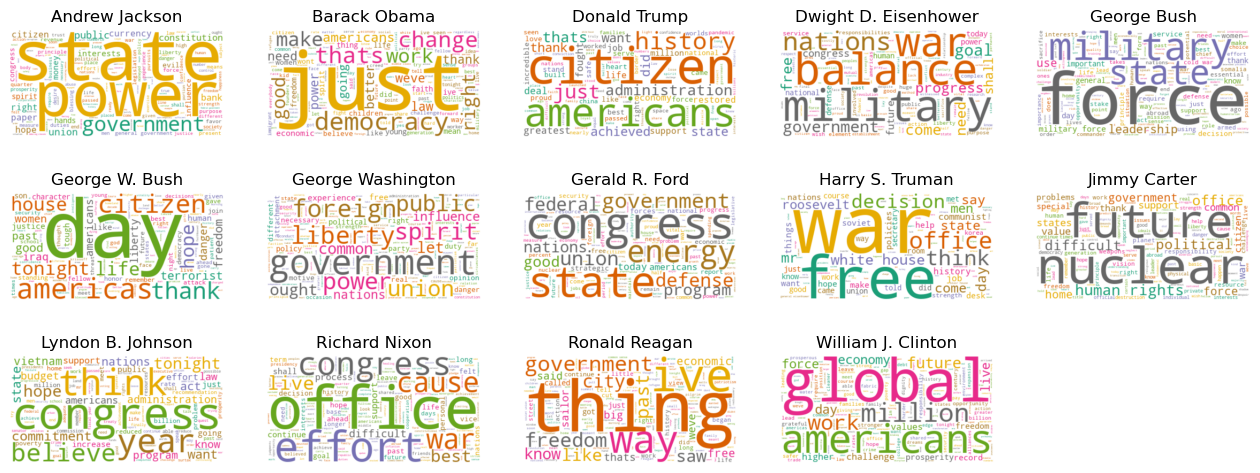

In [53]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Andrew Jackson','Barack Obama','Donald Trump','Dwight D. Eisenhower','George Bush','George W. Bush','George Washington','Gerald R. Ford','Harry S. Truman','Jimmy Carter','Lyndon B. Johnson','Richard Nixon','Ronald Reagan','William J. Clinton']


# Create subplots for each President
for index, president in enumerate(data.columns):
    wc.generate(data_clean.transcript[president])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

Findings: Every President has there own emphasis on different topics from the word cloud

### Number of unique words

Text(0.5, 1.0, '')

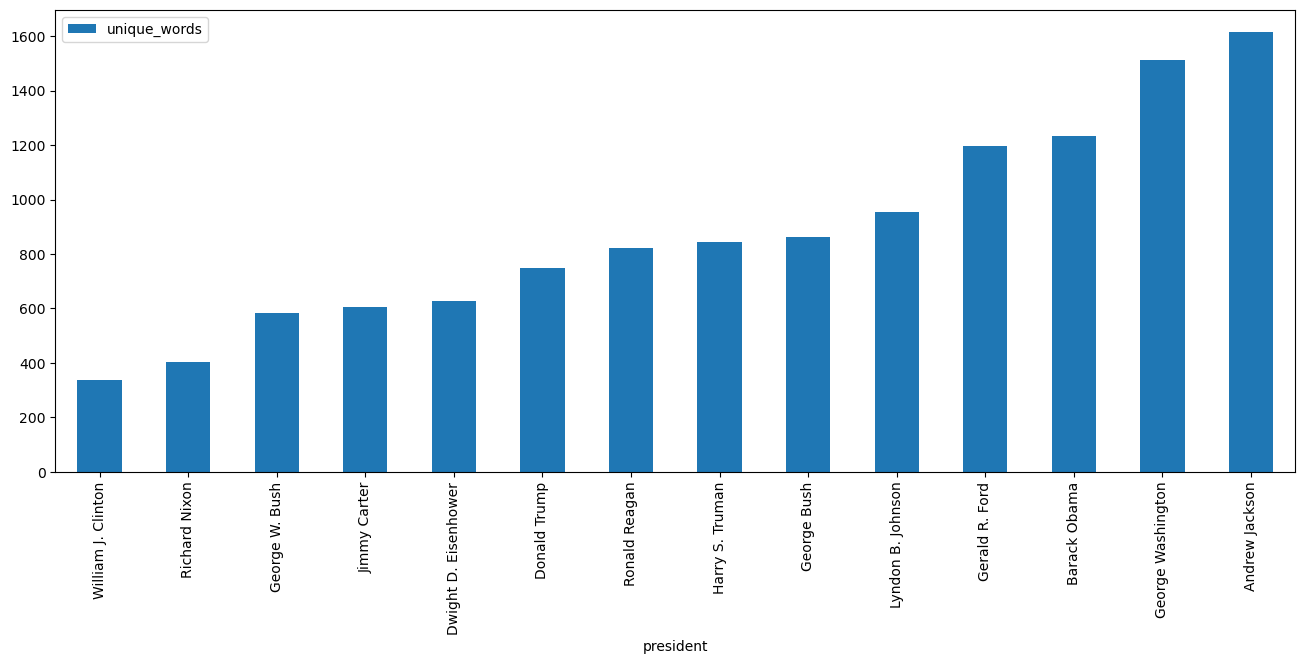

In [56]:
unique_list = []
for president in data.columns:
    uniques = data[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['president', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort.plot(kind= 'bar', x='president', y='unique_words')
plt.title("")

The dataframe provides information about the number of unique words used in the farewell speeches of various Presidents. It includes the President's name and the corresponding count of unique words. The dataframe is sorted in ascending order based on the number of unique words, starting from the President with the lowest count to the President with the highest count.

From the data, we can observe that Andrew Jackson has the highest number of unique words in his farewell speech, with a count of 1616. On the other hand, William J. Clinton has the lowest number of unique words, with a count of 336.

This information gives us insights into the vocabulary diversity and richness of each President's farewell speech. It highlights the variation in their communication styles and provides a glimpse into their individual approaches to delivering their final addresses.

In [57]:
data_unique_sort

,president,unique_words
13,William J. Clinton,336
11,Richard Nixon,404
5,George W. Bush,584
9,Jimmy Carter,605
3,Dwight D. Eisenhower,626
2,Donald Trump,748
12,Ronald Reagan,821
8,Harry S. Truman,844
4,George Bush,862
10,Lyndon B. Johnson,955


In [59]:
#  Let's take a look at the most common words again.
Counter(words).most_common()

[('people', 13),
 ('world', 12),
 ('years', 10),
 ('new', 10),
 ('country', 9),
 ('time', 9),
 ('president', 9),
 ('great', 8),
 ('united', 7),
 ('peace', 7),
 ('america', 7),
 ('american', 7),
 ('nation', 7),
 ('government', 6),
 ('states', 6),
 ('war', 6),
 ('congress', 5),
 ('just', 5),
 ('good', 5),
 ('americans', 5),
 ('life', 5),
 ('nations', 5),
 ('free', 5),
 ('public', 4),
 ('work', 4),
 ('thank', 4),
 ('past', 4),
 ('power', 3),
 ('union', 3),
 ('general', 3),
 ('spirit', 3),
 ('citizens', 3),
 ('liberty', 3),
 ('thats', 3),
 ('economic', 3),
 ('administration', 3),
 ('want', 3),
 ('support', 3),
 ('come', 3),
 ('future', 3),
 ('human', 3),
 ('forces', 3),
 ('know', 3),
 ('freedom', 3),
 ('office', 3),
 ('state', 2),
 ('interests', 2),
 ('rights', 2),
 ('influence', 2),
 ('ive', 2),
 ('weve', 2),
 ('going', 2),
 ('history', 2),
 ('economy', 2),
 ('military', 2),
 ('shall', 2),
 ('today', 2),
 ('defense', 2),
 ('national', 2),
 ('federal', 2),
 ('women', 2),
 ('way', 2),
 ('me

In [60]:
data

,Andrew Jackson,Barack Obama,Donald Trump,Dwight D. Eisenhower,George Bush,George W. Bush,George Washington,Gerald R. Ford,Harry S. Truman,Jimmy Carter,Lyndon B. Johnson,Richard Nixon,Ronald Reagan,William J. Clinton
abandon,0,0,0,0,0,0,1,0,0,1,0,0,0,0
abandoned,1,0,0,1,0,0,2,0,0,0,0,0,0,0
abhorrent,0,0,0,0,0,0,0,0,0,0,0,1,0,0
abide,1,0,0,0,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zablockiand,0,0,0,0,0,0,0,1,0,0,0,0,0,0
zanatta,0,0,0,0,0,0,0,0,0,0,0,0,1,0
zeal,1,0,0,0,0,0,4,0,0,0,0,0,0,0
zerosum,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# words used common
data_words = data.transpose()[['people', 'world', 'years','new','country','time','president', 'united','america'
                                   ,'government','congress','war']]
data_Common_words = pd.concat([data_words.people + data_words.world + data_words.years
                               + data_words.new + data_words.country + data_words.time 
                               + data_words.president + data_words.united + data_words.america
                               + data_words.government + data_words.congress
                                        , data_words.war                   
                              ], axis=1)
data_Common_words.columns = ['words','w_words']
data_Common_words


,words,w_words
Andrew Jackson,181,9
Barack Obama,92,2
Donald Trump,102,0
Dwight D. Eisenhower,41,5
George Bush,70,8
George W. Bush,65,0
George Washington,85,3
Gerald R. Ford,152,8
Harry S. Truman,116,16
Jimmy Carter,68,4


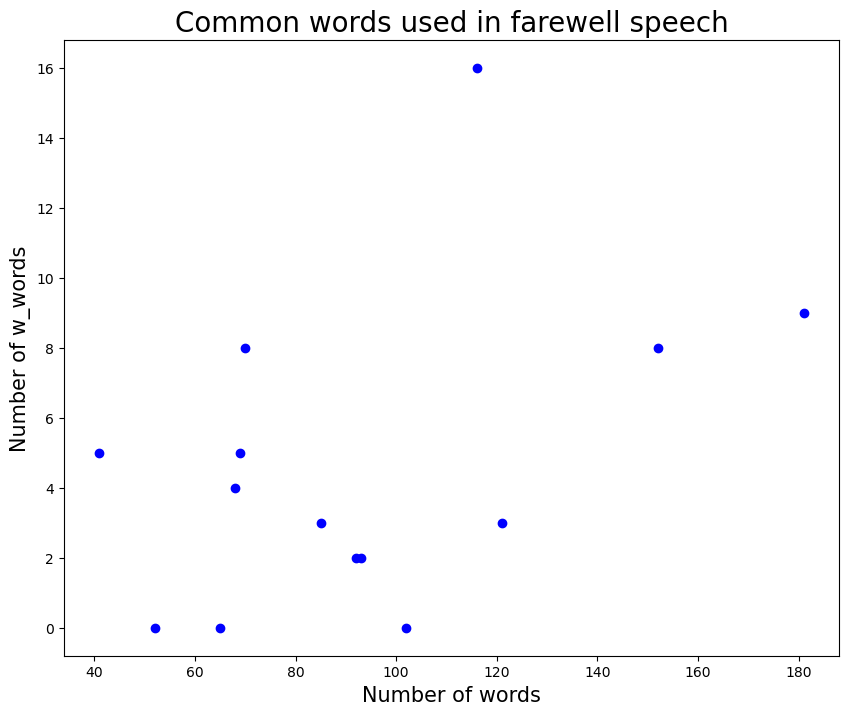

In [62]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, president in enumerate(data_Common_words.index):
    x = data_Common_words.words.loc[president]
    y = data_Common_words.w_words.loc[president]
    plt.scatter(x, y, color='blue')
    #plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    #plt.xlim(-5, 155) 
    
plt.title('Common words used in farewell speech', fontsize=20)
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of w_words', fontsize=15)

plt.show()

## Milestone 3

### NLP Techniques - Sentimental Analysis - TextBlob ( Rule based Technique)

Output: For each President, we will given them a sentiment score (how positive/negative are they) and a subjectivity score (how opinionated are they)

In [63]:
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
Andrew Jackson,"FELLOW-CITIZENS: Being about to retire finally from public life, I beg leave to offer you my grateful thanks for the many proofs of kindness and c...",Andrew Jackson
Barack Obama,"The President. Hello, Chicago! It's good to be home! Thank you. Thank you, everybody. Thank you. Thank you so much. Thank you. It's good to be hom...",Barack Obama
Donald Trump,"My fellow Americans, 4 years ago, we launched a great national effort to rebuild our country, to renew its spirit, and to restore the allegiance o...",Donald Trump
Dwight D. Eisenhower,"My fellow Americans: Three days from now, after half a century in the service of our country, I shall lay down the responsibilities of office as, ...",Dwight D. Eisenhower
George Bush,"Thank you all very much. Good luck. Please be seated. Thank you, General Graves, for that very kind introduction. Barbara and I are just delighted...",George Bush
George W. Bush,"Thank you. Fellow citizens: For 8 years, it has been my honor to serve as your President. The first decade of this new century has been a period o...",George W. Bush
George Washington,Friends and Fellow Citizens: The period for a new election of a citizen to administer the Executive Government of the United States being not far ...,George Washington
Gerald R. Ford,"Mr. Speaker, Mr. Vice President, Members of the 95th Congress, and distinguished guests: In accordance with the Constitution, I come before you on...",Gerald R. Ford
Harry S. Truman,"My fellow Americans: I am happy to have this opportunity to talk to you once more before I leave the White House. Next Tuesday, General Eisenhower...",Harry S. Truman
Jimmy Carter,"Good evening. In a few days I will lay down my official responsibilities in this office, to take up once more the only title in our democracy supe...",Jimmy Carter


In [66]:
pip install TextBlob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [67]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
Andrew Jackson,"FELLOW-CITIZENS: Being about to retire finally from public life, I beg leave to offer you my grateful thanks for the many proofs of kindness and c...",Andrew Jackson,0.119671,0.495448
Barack Obama,"The President. Hello, Chicago! It's good to be home! Thank you. Thank you, everybody. Thank you. Thank you so much. Thank you. It's good to be hom...",Barack Obama,0.190733,0.498014
Donald Trump,"My fellow Americans, 4 years ago, we launched a great national effort to rebuild our country, to renew its spirit, and to restore the allegiance o...",Donald Trump,0.215739,0.506593
Dwight D. Eisenhower,"My fellow Americans: Three days from now, after half a century in the service of our country, I shall lay down the responsibilities of office as, ...",Dwight D. Eisenhower,0.106401,0.497821
George Bush,"Thank you all very much. Good luck. Please be seated. Thank you, General Graves, for that very kind introduction. Barbara and I are just delighted...",George Bush,0.129386,0.462704
George W. Bush,"Thank you. Fellow citizens: For 8 years, it has been my honor to serve as your President. The first decade of this new century has been a period o...",George W. Bush,0.137257,0.477257
George Washington,Friends and Fellow Citizens: The period for a new election of a citizen to administer the Executive Government of the United States being not far ...,George Washington,0.136446,0.482271
Gerald R. Ford,"Mr. Speaker, Mr. Vice President, Members of the 95th Congress, and distinguished guests: In accordance with the Constitution, I come before you on...",Gerald R. Ford,0.158927,0.460844
Harry S. Truman,"My fellow Americans: I am happy to have this opportunity to talk to you once more before I leave the White House. Next Tuesday, General Eisenhower...",Harry S. Truman,0.159727,0.470156
Jimmy Carter,"Good evening. In a few days I will lay down my official responsibilities in this office, to take up once more the only title in our democracy supe...",Jimmy Carter,0.104344,0.452120


#### Analysis:

Andrew Jackson: The farewell speech by Andrew Jackson has a polarity score of 0.119671, indicating a slightly positive sentiment.

Barack Obama: The farewell speech by Barack Obama has a polarity score of 0.190733, suggesting a positive sentiment.

Donald Trump: The farewell speech by Donald Trump has a polarity score of 0.215739, indicating a positive sentiment.

Dwight D. Eisenhower: The farewell speech by Dwight D. Eisenhower has a polarity score of 0.106401, indicating a slightly positive sentiment.

George Bush: The farewell speech by George Bush has a polarity score of 0.129386, indicating a slightly positive sentiment.

George W. Bush: The farewell speech by George W. Bush has a polarity score of 0.137257, suggesting a slightly positive sentiment.

George Washington: The farewell speech by George Washington has a polarity score of 0.136446, indicating a slightly positive sentiment.

Gerald R. Ford: The farewell speech by Gerald R. Ford has a polarity score of 0.158927, suggesting a positive sentiment.

Harry S. Truman: The farewell speech by Harry S. Truman has a polarity score of 0.159727, suggesting a positive sentiment.

Jimmy Carter: The farewell speech by Jimmy Carter has a polarity score of 0.104344, indicating a slightly positive sentiment.

Lyndon B. Johnson: The farewell speech by Lyndon B. Johnson has a polarity score of 0.150955, suggesting a positive sentiment.

Richard Nixon: The farewell speech by Richard Nixon has a polarity score of 0.109035, indicating a slightly positive sentiment.

Ronald Reagan: The farewell speech by Ronald Reagan has a polarity score of 0.132442, suggesting a slightly positive sentiment.

William J. Clinton: The farewell speech by William J. Clinton has a polarity score of 0.249737, indicating a positive sentiment.

Overall, most of the farewell speeches in the dataframe have a positive sentiment, with some speeches leaning towards slightly positive sentiment.

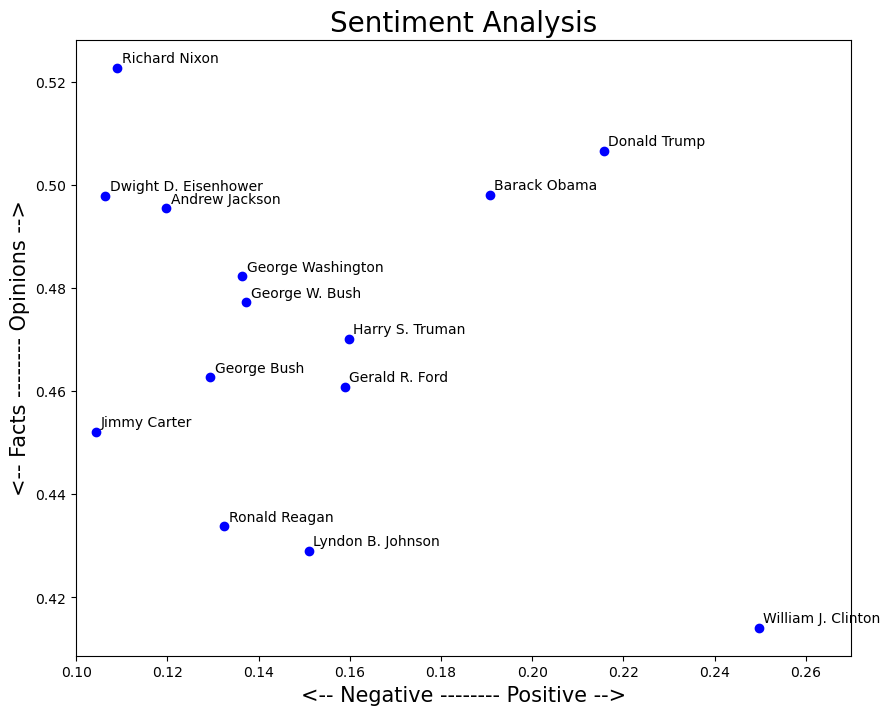

In [68]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, president in enumerate(data.index):
    x = data.polarity.loc[president]
    y = data.subjectivity.loc[president]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(.1, .27) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

#### Sentiment of Routine Over Time
Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [69]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):

    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [70]:
data

,transcript,full_name,polarity,subjectivity
Andrew Jackson,"FELLOW-CITIZENS: Being about to retire finally from public life, I beg leave to offer you my grateful thanks for the many proofs of kindness and c...",Andrew Jackson,0.119671,0.495448
Barack Obama,"The President. Hello, Chicago! It's good to be home! Thank you. Thank you, everybody. Thank you. Thank you so much. Thank you. It's good to be hom...",Barack Obama,0.190733,0.498014
Donald Trump,"My fellow Americans, 4 years ago, we launched a great national effort to rebuild our country, to renew its spirit, and to restore the allegiance o...",Donald Trump,0.215739,0.506593
Dwight D. Eisenhower,"My fellow Americans: Three days from now, after half a century in the service of our country, I shall lay down the responsibilities of office as, ...",Dwight D. Eisenhower,0.106401,0.497821
George Bush,"Thank you all very much. Good luck. Please be seated. Thank you, General Graves, for that very kind introduction. Barbara and I are just delighted...",George Bush,0.129386,0.462704
George W. Bush,"Thank you. Fellow citizens: For 8 years, it has been my honor to serve as your President. The first decade of this new century has been a period o...",George W. Bush,0.137257,0.477257
George Washington,Friends and Fellow Citizens: The period for a new election of a citizen to administer the Executive Government of the United States being not far ...,George Washington,0.136446,0.482271
Gerald R. Ford,"Mr. Speaker, Mr. Vice President, Members of the 95th Congress, and distinguished guests: In accordance with the Constitution, I come before you on...",Gerald R. Ford,0.158927,0.460844
Harry S. Truman,"My fellow Americans: I am happy to have this opportunity to talk to you once more before I leave the White House. Next Tuesday, General Eisenhower...",Harry S. Truman,0.159727,0.470156
Jimmy Carter,"Good evening. In a few days I will lay down my official responsibilities in this office, to take up once more the only title in our democracy supe...",Jimmy Carter,0.104344,0.452120


In [71]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["FELLOW-CITIZENS: Being about to retire finally from public life, I beg leave to offer you my grateful thanks for the many proofs of kindness and confidence which I have received at your hands. It has been my fortune in the discharge of public duties, civil and military, frequently to have found myself in difficult and trying situations, where prompt decision and energetic action were necessary, and where the interest of the country required that high responsibilities should be fearlessly encountered; and it is with the deepest emotions of gratitude that I acknowledge the continued and unbroken confidence with which you have sustained me in every trial. My public life has been a long one, and I can not hope that it has at all times been free from errors; but I have the consolation of knowing that if mistakes have been committed they have not seriously injured the country I so anxiously endeavored to serve, and at the moment when I surrender my last public trust I leave this great peo

In [72]:
# The list has 10 elements, one for each transcript
len(list_pieces)

14

In [73]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [74]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.09681818181818183,
  0.17526844070961714,
  0.08336066290611745,
  0.07754797441364603,
  0.12484848484848485,
  0.05276029055690074,
  0.07560185185185184,
  0.14571846282372594,
  0.13963913690476193,
  0.2194802146210597],
 [0.2760745755426606,
  0.15197258297258295,
  0.16620370370370371,
  0.15249838813668595,
  0.08620346320346321,
  0.14698322510822506,
  0.09133333333333332,
  0.19230769230769232,
  0.34392057218144184,
  0.2601156119013261],
 [0.3985454545454546,
  0.20792011019283743,
  0.19657240608853513,
  0.14248737373737375,
  0.18144325912183054,
  0.13057359307359306,
  0.14199340342197483,
  0.27040229885057476,
  0.19491582491582493,
  0.29659740259740264],
 [0.11853054353054353,
  0.22361111111111112,
  0.012301587301587289,
  0.08541666666666667,
  0.09768435587401104,
  3.96508223080413e-18,
  0.19393939393939394,
  0.06113215488215487,
  0.02521730914588057,
  0.29020202020202024],
 [0.2322657450076804,
  0.06766690340909089,
  0.16906265031265028,
  -0.00416

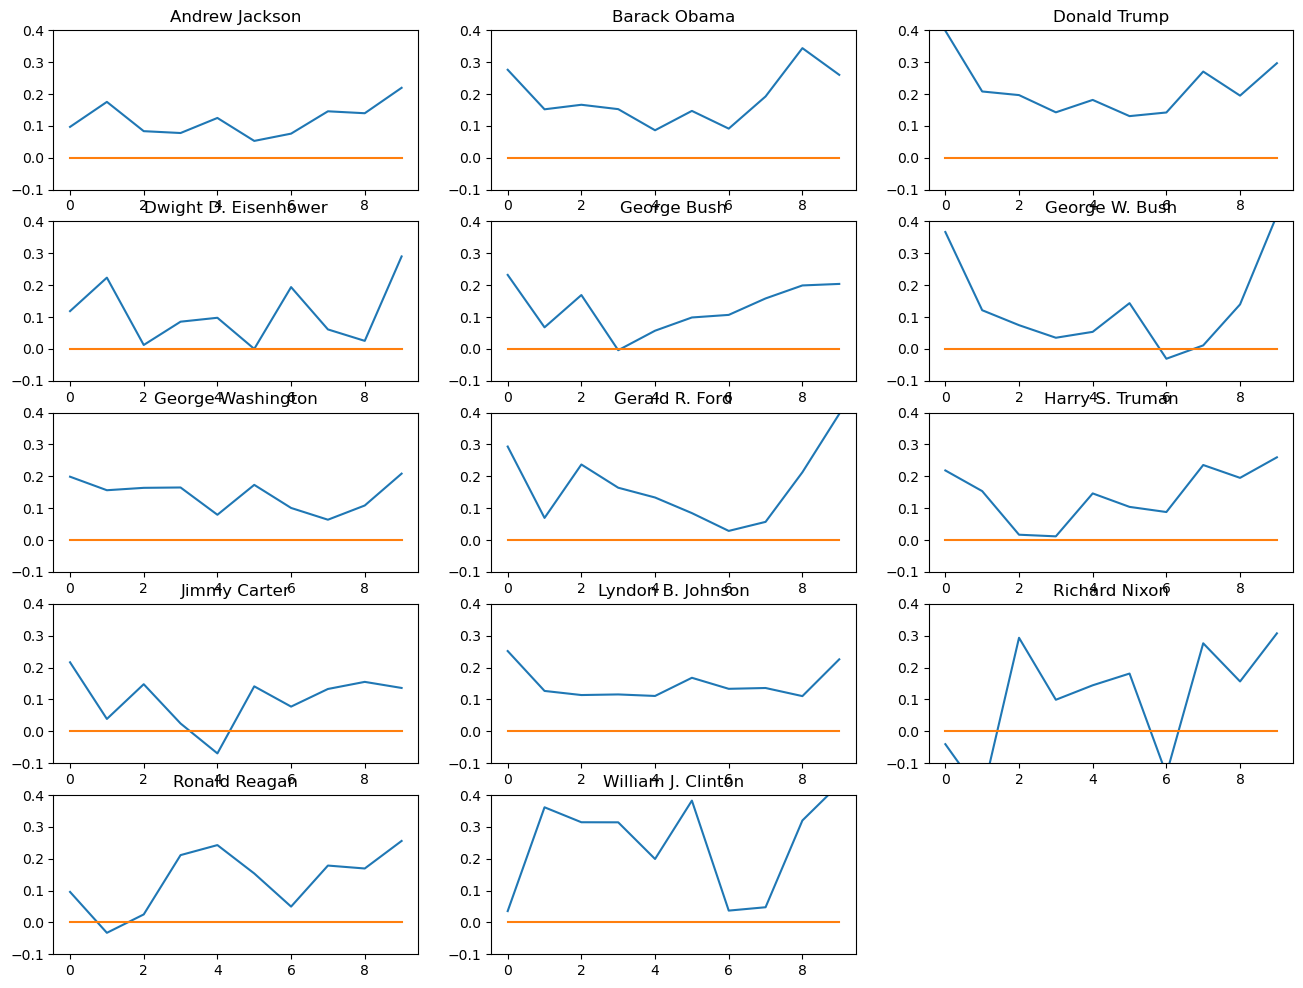

In [75]:
# Show the plot for all Presidents
plt.rcParams['figure.figsize'] = [16, 12]

for index, president in enumerate(data.index):    
    plt.subplot(5, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=-.1, top=.4)
    
plt.show()

Most of the Presidents stays generally positive throughout their speech . Only George W Bush , Jimmy Carter, Richard Nixon spoke about some negative 
